<h1 style="display: flex; align-items: center;">
  WoMakersCode
  <img src="https://cdn-images-1.medium.com/v2/resize:fit:1200/1*B8rGvo7fJ7qL4uFJ_II_-w.png" alt="Python logo" width="30" style="margin-left: 10px;">
</h1>

<h1> 🦋Bootcamp Data Analytics🦋</h1>

## <font color = pink>**Desafio Individual - Modelo de Classificação e Regressão Logística**

In [ ]:
# Importando os bibliotecas/pacotes
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline

## Dataset iris

In [ ]:
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### a. Faça uma análise inicial sobre esse dataset

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
print(df_iris["species"].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


### b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

In [ ]:
# Mapear os números das classes para os nomes das espécies
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_iris['species'] = df_iris['species'].map(species_mapping)

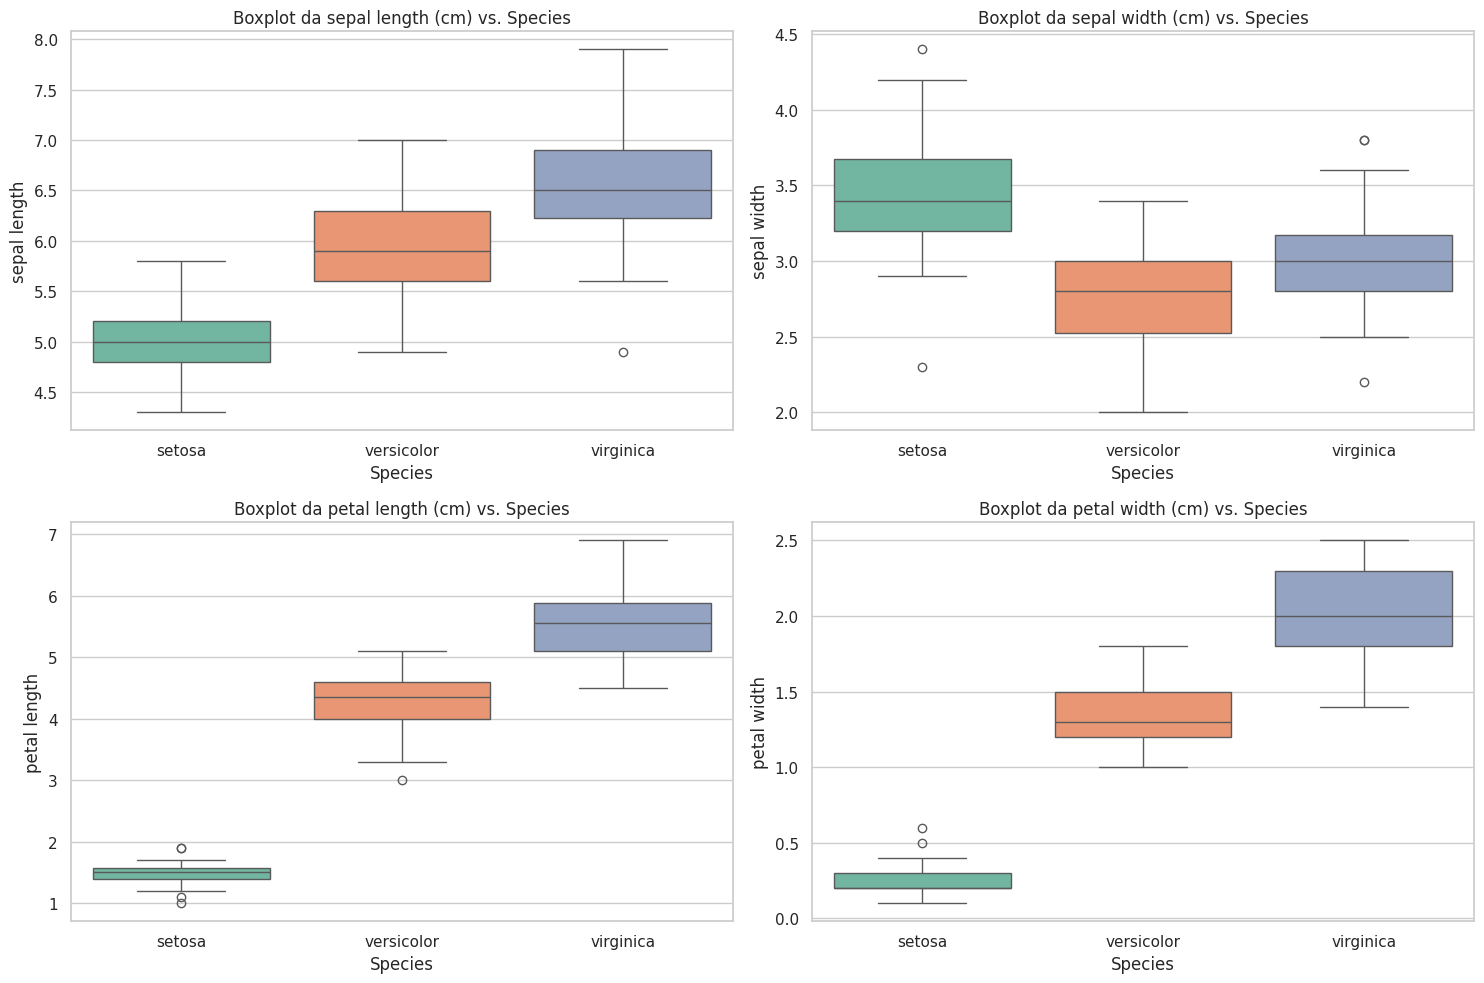

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar um boxplot para cada variável em relação à espécie
for i, column in enumerate(df_iris.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df_iris, palette='Set2')
    plt.title(f'Boxplot da {column} vs. Species')
    plt.xlabel('Species')
    plt.ylabel(column.replace(' (cm)', ''))

plt.tight_layout()
plt.show()

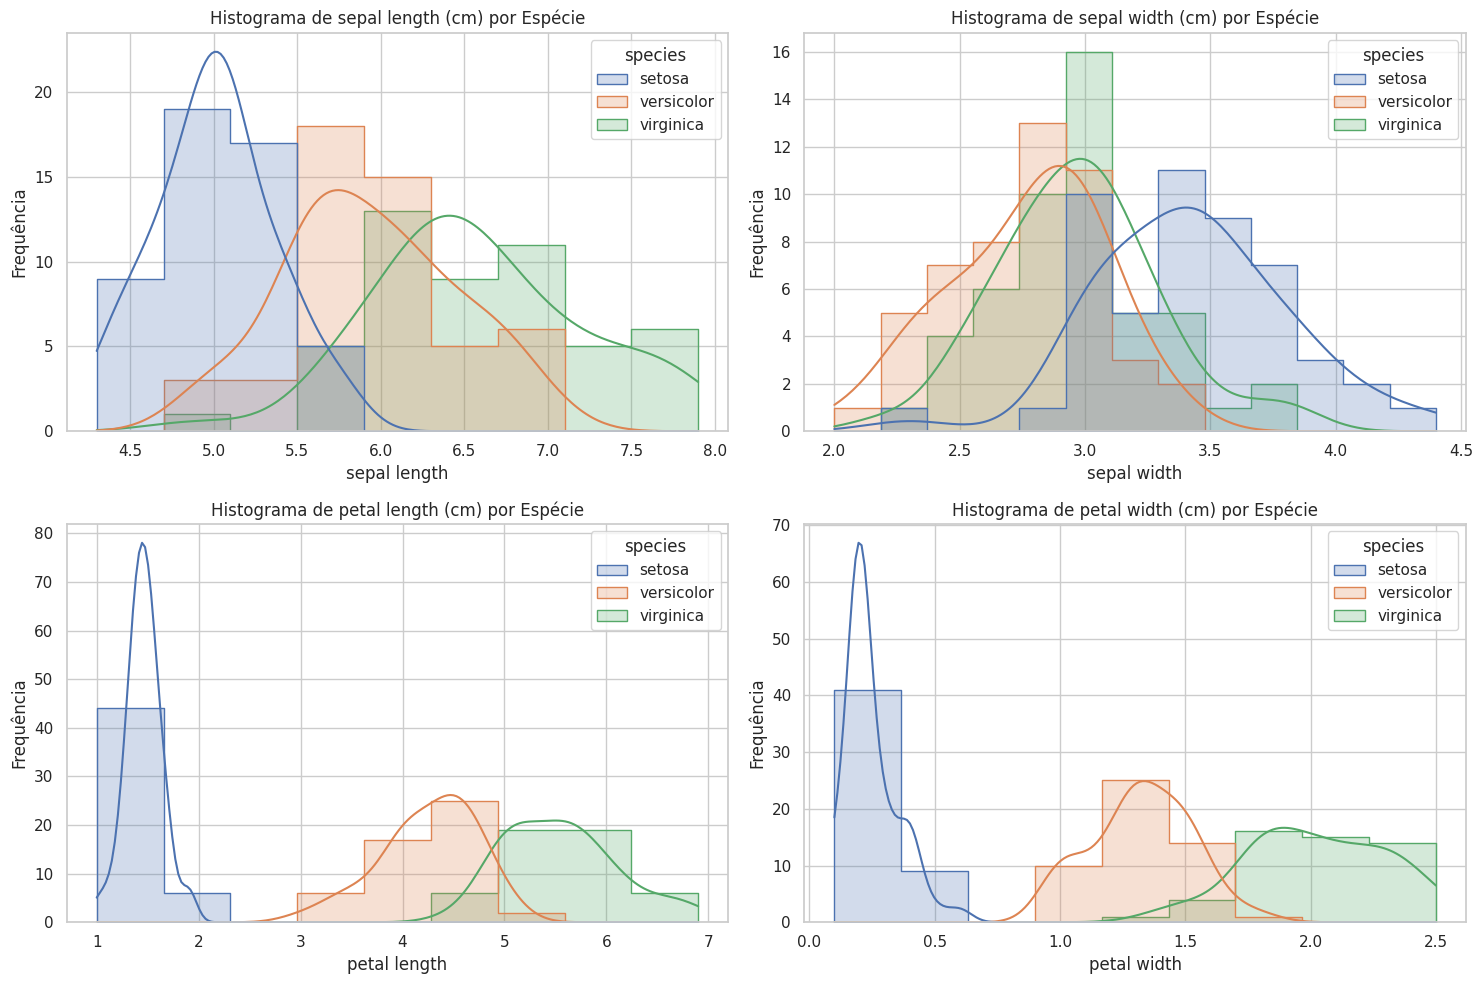

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar um histograma para cada variável em relação à espécie
for i, column in enumerate(df_iris.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_iris, x=column, hue='species', kde=True, element='step')
    plt.title(f'Histograma de {column} por Espécie')
    plt.xlabel(column.replace(' (cm)', ''))
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

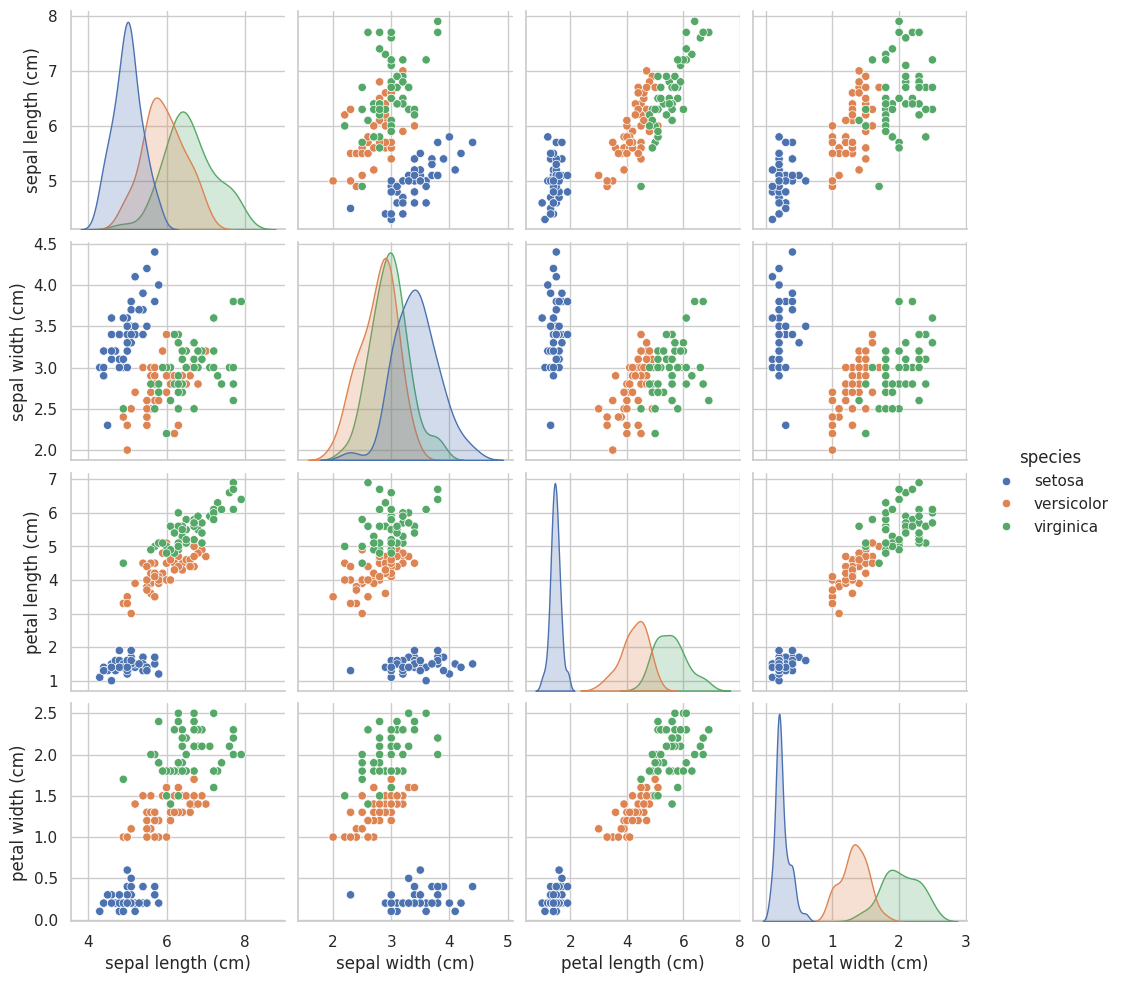

In [ ]:
sns.pairplot(df_iris, hue='species')

### c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?

### d. Aplique a regressão logística para avaliar o modelo de classificação.

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X = df_iris.drop('species', axis=1)
y = df_iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

In [ ]:
# Ajustar o modelo de regressão logística
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

### e. Calcule a acurácia, precisão e recall.

In [ ]:
# Calcular acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
# Exibir os resultados
print(f"Acurácia: {accuracy:.2%}")
print(f"Precisão: {precision:.2%}")
print(f"Recall: {recall:.2%}")

Acurácia: 92.92%
Precisão: 94.15%
Recall: 92.92%


### f. Plote a matriz de confusao com matplotlib ou seaborn

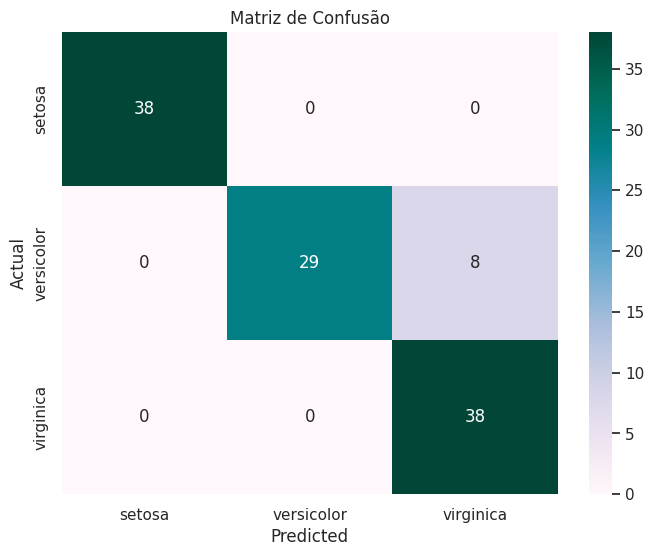

In [ ]:
# Exibir a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Exibir o relatório de classificação completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       1.00      0.78      0.88        37
   virginica       0.83      1.00      0.90        38

    accuracy                           0.93       113
   macro avg       0.94      0.93      0.93       113
weighted avg       0.94      0.93      0.93       113



In [ ]:
# Comparação dados de teste e treino
y_pred = model.predict(X_test)
comparar = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
comparar = comparar.reset_index(drop = True)
comparar[:21]

,Real,Previsto
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


## Dataset load_digits

In [ ]:
df_digits = load_digits()
df_digits = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


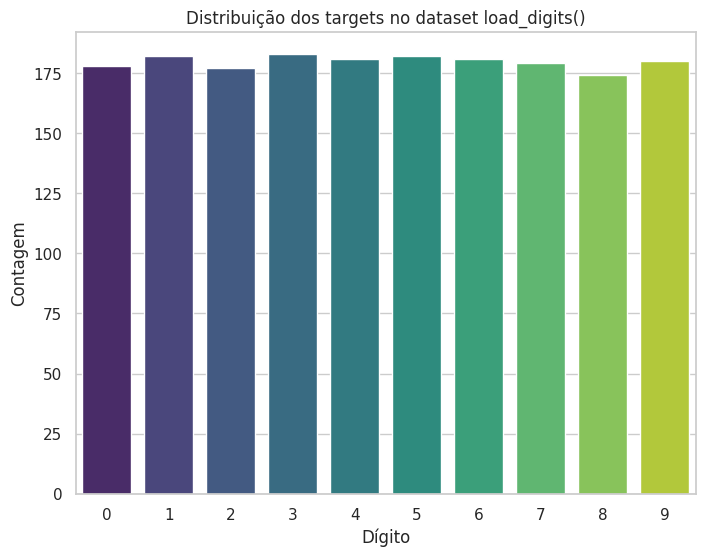

In [ ]:
# Carregar o dataset
digits = load_digits()

# Contar a distribuição dos targets
target_counts = pd.Series(digits.target).value_counts().sort_index()

# Plotar a distribuição dos targets
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xlabel('Dígito')
plt.ylabel('Contagem')
plt.title('Distribuição dos targets no dataset load_digits()')
plt.show()

a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

In [ ]:
# Quantidade de instâncias
df_digits.shape[0]

1797

In [ ]:
# Quantidade de features incluido a coluna target
df_digits.shape[1]

64

ii. Existem dados nulos? Se sim quantos?

In [ ]:
# 2. Verificar se existem dados nulos
df_digits.isnull().sum().sum()

0

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
data_types = df_digits.dtypes
print("\nTipos de dados nas colunas:")
print(data_types)


Tipos de dados nas colunas:
pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object


b. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.

In [ ]:
#Load Data
df_digits = load_digits()
X = df_digits.data
y = df_digits.target

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=0)

In [ ]:
# Ajustar o modelo de regressão logística
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

c. Calcule a acurácia, precisão e recall.

In [ ]:
# Calcular acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
# Exibir os resultados
print(f"Acurácia: {accuracy:.2%}")
print(f"Precisão: {precision:.2%}")
print(f"Recall: {recall:.2%}")

Acurácia: 94.85%
Precisão: 94.96%
Recall: 94.85%


d. Plote a matriz de confusão com matplotlib ou seaborn

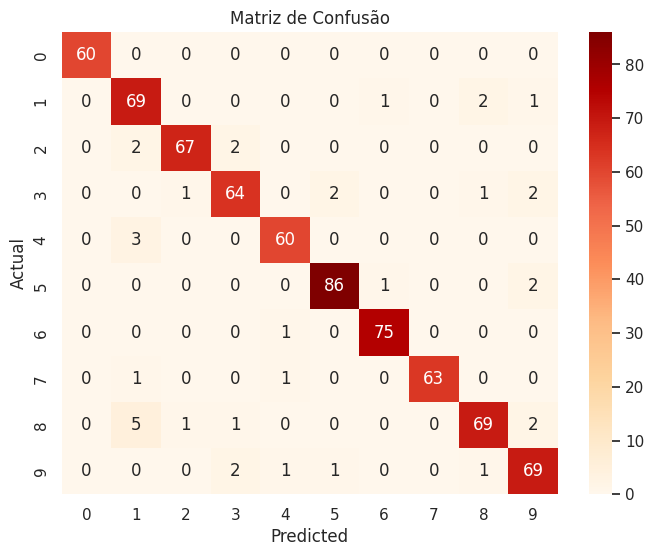

In [ ]:
# Exibir a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='OrRd',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Exibir o relatório de classificação completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.86      0.95      0.90        73
           2       0.97      0.94      0.96        71
           3       0.93      0.91      0.92        70
           4       0.95      0.95      0.95        63
           5       0.97      0.97      0.97        89
           6       0.97      0.99      0.98        76
           7       1.00      0.97      0.98        65
           8       0.95      0.88      0.91        78
           9       0.91      0.93      0.92        74

    accuracy                           0.95       719
   macro avg       0.95      0.95      0.95       719
weighted avg       0.95      0.95      0.95       719



In [ ]:
# Comparação dados de teste e treino
y_pred = model.predict(X_test)
comparar = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
comparar = comparar.reset_index(drop = True)
comparar[:21]

,Real,Previsto
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
5,7,7
6,1,1
7,9,9
8,8,8
9,5,5
